In [11]:
# !pip install numpy matplotlib pandas tqdm

In [12]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
with open("metrics_opencl.json", encoding="utf-8") as f:
    data = json.load(f)

In [14]:
df = pd.DataFrame(data)
df.sort_values("duration", ascending=False)

,duration,value,block_size,size,runtime,device,grid_size
122,0.254616,0.033328,64,10000000,OpenCL,Intel(R) Arc(TM) Graphics,256.0
134,0.230729,0.033328,512,10000000,OpenCL,Intel(R) Arc(TM) Graphics,256.0
138,0.208531,0.033328,1024,10000000,OpenCL,Intel(R) Arc(TM) Graphics,256.0
126,0.185868,0.033328,128,10000000,OpenCL,Intel(R) Arc(TM) Graphics,256.0
119,0.182566,0.033328,32,10000000,clBLASt,Intel(R) Arc(TM) Graphics,256.0
...,...,...,...,...,...,...,...
53,0.003115,0.033326,1024,10000000,OpenBLAS,CPU,32.0
17,0.002985,0.033326,256,10000000,OpenBLAS,CPU,16.0
33,0.002955,0.033326,32,10000000,OpenBLAS,CPU,32.0
25,0.002934,0.033326,1024,10000000,OpenBLAS,CPU,16.0


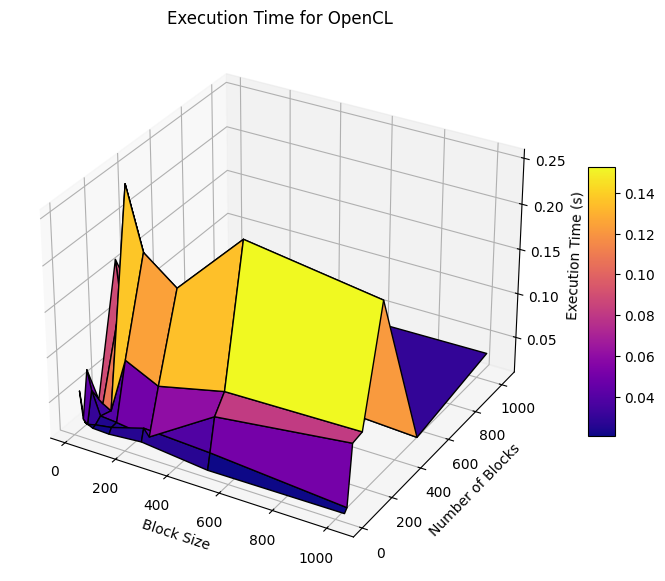

In [ ]:
runtimes = df["runtime"].unique()

target_runtime = 'OpenCL'
df_filtered = df[df['runtime'] == target_runtime]

block_sizes = sorted(df_filtered['block_size'].unique())
counts = sorted(df_filtered['grid_size'].unique())

X, Y = np.meshgrid(block_sizes, counts)
Z = np.zeros_like(X, dtype=float)

for i, count in enumerate(counts):
    for j, block in enumerate(block_sizes):
        match = df_filtered[
            (df_filtered['block_size'] == block) &
            (df_filtered['grid_size'] == count)
        ]
        if not match.empty:
            Z[i, j] = match['duration'].values[0]
        else:
            Z[i, j] = np.nan

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')

ax.set_xlabel('Block Size')
ax.set_ylabel('Number of Blocks')
ax.set_zlabel('Execution Time (s)')
ax.set_title(f'Execution Time for {target_runtime}')
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()
